In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
gender=pd.read_csv('gendered_titles_final.csv')
gender=gender.drop_duplicates(subset='Name')

In [40]:
gender['malewords']=gender['he']+gender['his']+gender['him']+gender['male']+gender['man']
gender['femalewords']=gender['she']+gender['her']+gender['hers']+gender['female']+gender['woman']
gender=gender[['Name','malewords','femalewords','gender']]

In [41]:
female=gender[gender['gender']=='f']
male=gender[gender['gender']=='m']
ff=female['femalewords'].sum()
fm=female['malewords'].sum()
mm=male['malewords'].sum()
mf=male['femalewords'].sum()


In [42]:
print("Part of female words in female articles: ",ff/(ff+fm)*100,"%")
print("Part of male words in female articles: ",fm/(ff+fm)*100,"%")
print("Part of female words in male articles: ",mf/(mm+mf)*100,"%")
print("Part of male words in male articles : ",mm/(mm+mf)*100,"%")
print(" ")
print("Average number of male words in a female article: ",fm/len(female))
print("Average number of female words in a female article:", ff/len(female))
print("Average number of female words in a male article",mf/len(male))
print("Average number of male words in a male article",mm/len(male))




Part of female words in female articles:  93.15395655079482 %
Part of male words in female articles:  6.846043449205184 %
Part of female words in male articles:  1.9147732492638279 %
Part of male words in male articles :  98.08522675073618 %
 
Average number of male words in a female article:  1.4748642907717724
Average number of female words in a female article: 20.068444654236487
Average number of female words in a male article 0.40375203915171287
Average number of male words in a male article 20.682402120717782


In [43]:
#randomize the order of rows in gender
gender=gender.sample(frac=1).reset_index(drop=True)


In [44]:
female=gender[gender['gender']=='f']
male=gender[gender['gender']=='m']

fflist=[]
fmlist=[]
mmlist=[]
mflist=[]

for index, row in female.iterrows():
    female_total = row['femalewords'] + row['malewords']
    if female_total > 0: 
        fflist.append((row['femalewords'] / female_total) * 100)
        fmlist.append((row['malewords'] / female_total) * 100)
    else:
        fflist.append(0)
        fmlist.append(0)

for index, row in male.iterrows():
    male_total = row['femalewords'] + row['malewords']
    if male_total > 0: 
        mflist.append((row['femalewords'] / male_total) * 100)
        mmlist.append((row['malewords'] / male_total) * 100)
    else:
        mflist.append(0)
        mmlist.append(0)

In [45]:
def bootstrap_resample(data1, data2, n_resamples=1000):
    differences = []
    for _ in range(n_resamples):
        sample1 = np.random.choice(data1, size=2000, replace=True)
        sample2 = np.random.choice(data2, size=2000, replace=True)  
        differences.append(np.mean(sample1) - np.mean(sample2))
    return differences

In [57]:
bootstrap_differences = bootstrap_resample(fflist, mmlist)
bootstrap_differences = np.array(bootstrap_differences)
ci_lower = np.percentile(bootstrap_differences, 2.5)
ci_upper = np.percentile(bootstrap_differences, 97.5)

# Calculate the mean difference
mean_diff = np.mean(bootstrap_differences)

# Calculate p-value
p_value = np.mean((bootstrap_differences <= 0) if mean_diff > 0 else (bootstrap_differences >= 0)) * 2  
print("Bootstrap resampling results for female malewords vs male femalewords:")
print(f"Mean difference: {np.mean(bootstrap_differences)}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p_value}")

if ci_lower > 0 or ci_upper < 0:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")


Bootstrap resampling results for female malewords vs male femalewords:
Mean difference: 6.650309119197049
95% Confidence Interval: (5.385762257518631, 7.864749161018207)
P-value: 0.0
reject null hypothesis


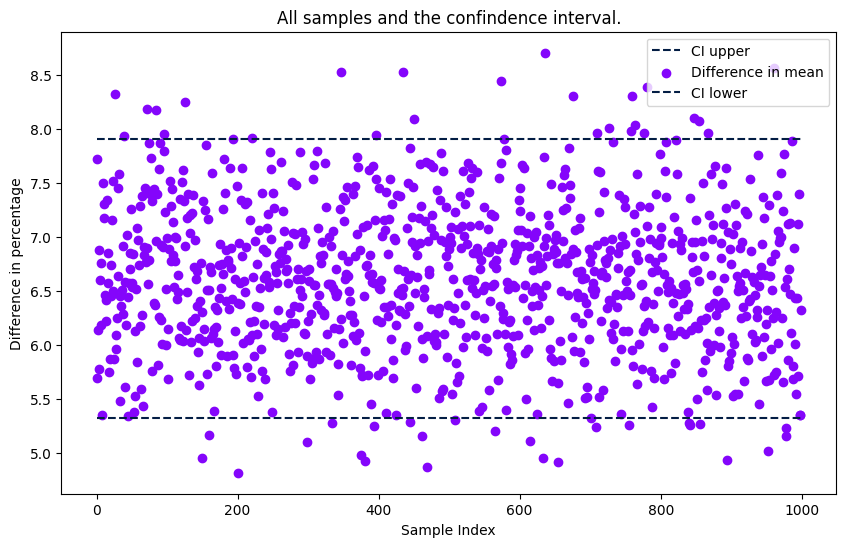

In [48]:
upper = ci_upper * np.ones(1000)
lower = ci_lower * np.ones(1000)
plt.figure(figsize=(10, 6))
plt.plot(upper, label='CI upper', linestyle='--', color='#031D44')
plt.scatter(np.arange(1000), bootstrap_differences, label='Difference in mean', color='#8405FB', marker='o')
plt.plot(lower, label='CI lower', linestyle='--', color='#031D44')

plt.title('All samples and the confindence interval.')
plt.xlabel('Sample Index')
plt.ylabel('Difference in percentage')

plt.legend()

plt.show()